In [16]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

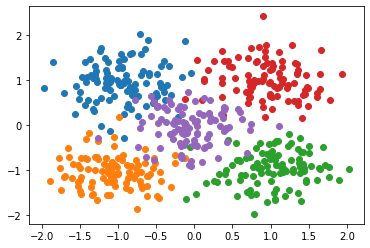

In [26]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

In [29]:
y_cat = to_categorical(y, 5)

In [32]:
model = Sequential()
model.add(Dense(units=5, input_shape=(2,), activation='softmax'))
model.compile(Adam(0.1), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.fit(x=X, y=y_cat, verbose = 1, batch_size = 50, epochs = 100, shuffle = 'true')

Epoch 1/100
10/10 [==============================] - 0s 1ms/step - loss: 1.3667 - accuracy: 0.4280
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6577 - accuracy: 0.8200
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.9040
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.3492 - accuracy: 0.9420
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2992 - accuracy: 0.9480
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2732 - accuracy: 0.9400
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2543 - accuracy: 0.9420
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2400 - accuracy: 0.9440
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2300 - accuracy: 0.9480
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2199 - accuracy: 0.9480
Epoch 11/

In [23]:
def plot_decision_boundary(X, y_cat, model):
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = np.argmax(model.predict(grid), axis =-1 )
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

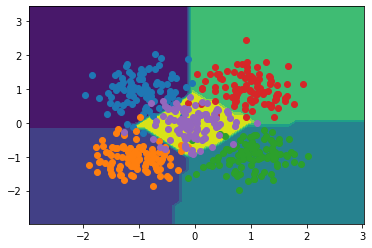

In [34]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

Prediction is:  [[4.4930700e-02 5.3343385e-05 1.4142007e-05 7.2343566e-02 8.8265830e-01]]


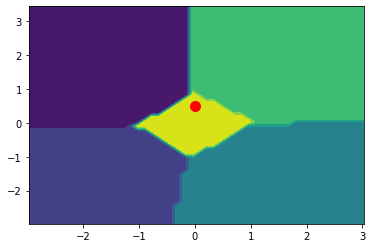

In [36]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
x=0
y=0.5
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x],[y], marker='o', markersize=10, color='red')
print("Prediction is: ", prediction)